In [ ]:
#Loading (three(3).csv)files containing datasets for analysis#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv(r'/Users/goldfish/archive (4)/employee_survey_data.csv')
df1=pd.read_csv(r'/Users/goldfish/archive (4)/general_data.csv')
df2=pd.read_csv(r'/Users/goldfish/archive (4)/manager_survey_data.csv')
df=pd.read_csv(r'/Users/goldfish/archive (4)/employee_survey_data.csv')

In [8]:
df

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


In [10]:
df1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [12]:
df2

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


In [ ]:
#DATA CLEANING,STANDARDINZATION AND MERGING OF DATAFRAMES.#

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [31]:
merged_df=df1.merge(df, on='EmployeeID', how='inner')  # Inner join

In [33]:
merged_df=df1.merge(df, on='EmployeeID', how='inner')  # Inner join

In [35]:
print(merged_df)

      Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                   10          1  Life Sciences 

In [ ]:
#Solving layout issue#

In [37]:
print(merged_df.duplicated().sum())  # Count duplicate rows

0


In [39]:
print(merged_df.shape)  # (rows, columns)
print(merged_df.info())  # Data types & missing values
print(merged_df.head())  # First few rows

(4410, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesW

In [43]:
merged_df.reset_index(drop=True, inplace=True)

In [45]:
print(merged_df)


      Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                   10          1  Life Sciences 

In [51]:
print(merged_df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance             0
dtype: int64


In [ ]:
#Fill NaN with Median#

In [49]:
merged_df['WorkLifeBalance'].fillna(merged_df['WorkLifeBalance'].median(), inplace=True)

/var/folders/rn/v5gd6t197njckjxryw4v22g80000gn/T/ipykernel_42068/1665444212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['WorkLifeBalance'].fillna(merged_df['WorkLifeBalance'].median(), inplace=True)


In [53]:
print(merged_df.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
dtype: object


In [ ]:
#Convert Float Columns to Integer (If No Missing Values)#

In [55]:
print(merged_df[['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction','JobSatisfaction', 'WorkLifeBalance']].isnull().sum())


NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance             0
dtype: int64


In [57]:

#Convert Float Columns to Integer (If No Missing Values)#

In [59]:
print(merged_df)

      Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                   10          1  Life Sciences 

In [ ]:
# Started over to change'merged_df['WorkLifeBalance'].fillna(merged_df['WorkLifeBalance'].median(), inplace=True)'
#and use mode instead#

In [61]:
df1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [63]:
df

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


In [65]:
print(df.isnull().sum())

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64


In [ ]:
#Cleaning process#

In [ ]:
#Fill Categorical/Ordinal Scores with Mode (Most Frequent Value)#

In [67]:
df['EnvironmentSatisfaction'].fillna(df['EnvironmentSatisfaction'].mode()[0], inplace=True)
df['JobSatisfaction'].fillna(df['JobSatisfaction'].mode()[0], inplace=True)
df['WorkLifeBalance'].fillna(df['WorkLifeBalance'].mode()[0], inplace=True)


/var/folders/rn/v5gd6t197njckjxryw4v22g80000gn/T/ipykernel_42068/1087934880.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EnvironmentSatisfaction'].fillna(df['EnvironmentSatisfaction'].mode()[0], inplace=True)
/var/folders/rn/v5gd6t197njckjxryw4v22g80000gn/T/ipykernel_42068/1087934880.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate

In [69]:
print(df.isnull().sum())

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64


In [71]:
print(df1.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [ ]:
#Fill Numerical Columns with Median (Recommended)#

In [73]:
df1['NumCompaniesWorked'].fillna(df1['NumCompaniesWorked'].median(), inplace=True)
df1['TotalWorkingYears'].fillna(df1['TotalWorkingYears'].median(), inplace=True)

/var/folders/rn/v5gd6t197njckjxryw4v22g80000gn/T/ipykernel_42068/4002004845.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['NumCompaniesWorked'].fillna(df1['NumCompaniesWorked'].median(), inplace=True)
/var/folders/rn/v5gd6t197njckjxryw4v22g80000gn/T/ipykernel_42068/4002004845.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [75]:
print(df1.isnull().sum())

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


In [77]:
print(df1.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object


In [ ]:
#Convert Float Columns to Integer #

In [79]:
df1[['NumCompaniesWorked', 'TotalWorkingYears']] = df1[['NumCompaniesWorked','TotalWorkingYears']].astype('int64')

In [81]:
print(df1.dtypes)

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeCount               int64
EmployeeID                  int64
Gender                     object
JobLevel                    int64
JobRole                    object
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
Over18                     object
PercentSalaryHike           int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object


In [83]:
print(df.dtypes)

EmployeeID                   int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
dtype: object


In [85]:
df[['EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance ']] = df[['EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance']].astype('int64')

In [87]:
print(df.dtypes)

EmployeeID                   int64
EnvironmentSatisfaction      int64
JobSatisfaction              int64
WorkLifeBalance            float64
WorkLifeBalance              int64
dtype: object


In [89]:
df

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,WorkLifeBalance
0,1,3,4,2.0,2
1,2,3,2,4.0,4
2,3,2,2,1.0,1
3,4,4,4,3.0,3
4,5,4,1,3.0,3
...,...,...,...,...,...
4405,4406,4,1,3.0,3
4406,4407,4,4,3.0,3
4407,4408,1,3,3.0,3
4408,4409,4,1,3.0,3


In [93]:
df

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,WorkLifeBalance
0,1,3,4,2.0,2
1,2,3,2,4.0,4
2,3,2,2,1.0,1
3,4,4,4,3.0,3
4,5,4,1,3.0,3
...,...,...,...,...,...
4405,4406,4,1,3.0,3
4406,4407,4,4,3.0,3
4407,4408,1,3,3.0,3
4408,4409,4,1,3.0,3


In [95]:
df1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1,Y,11,8,0,1,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0,Y,23,8,1,6,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1,Y,15,8,3,5,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3,Y,11,8,3,13,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4,Y,12,8,2,9,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3,Y,17,8,1,10,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2,Y,15,8,0,10,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0,Y,20,8,0,5,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0,Y,14,8,1,10,2,9,7,8


In [103]:
print(df.dtypes)
print(df.isnull().sum())

EmployeeID                   int64
EnvironmentSatisfaction      int64
JobSatisfaction              int64
WorkLifeBalance            float64
WorkLifeBalance              int64
dtype: object
EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
WorkLifeBalance            0
dtype: int64


In [105]:
# Drop Columns with float64 Data Type#
df = df.loc[:, df.dtypes != 'float64']

In [107]:
df

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3,4,2
1,2,3,2,4
2,3,2,2,1
3,4,4,4,3
4,5,4,1,3
...,...,...,...,...
4405,4406,4,1,3
4406,4407,4,4,3
4407,4408,1,3,3
4408,4409,4,1,3


In [111]:
print(df2.isnull().sum())
print(df2.dtypes)

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64
EmployeeID           int64
JobInvolvement       int64
PerformanceRating    int64
dtype: object


In [113]:
merged_df1=df1.merge(df, on='EmployeeID', how='inner')  # Inner join

In [117]:
print(merged_df1)
print(merged_df1.isnull().sum())

      Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                   10          1  Life Sciences 

In [ ]:
#Trying to resolve layout issue

In [121]:
print(merged_df1.head())  # Look at first few rows
print(merged_df1.dtypes)  # Check column types
print(merged_df1.columns)  # Inspect column names

   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   StandardHours StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0       

In [125]:
#Remove Any Extra Spaces in Column Names#
df.columns = df.columns.str.strip()
print(df.columns)

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance'],
      dtype='object')


In [127]:
merged_df1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1,6,1,0,0,3,4,2
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6,3,5,1,4,3,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,8,3,5,2,5,0,3,2,2,1
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,3,13,5,8,7,5,4,4,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,8,2,9,2,6,0,4,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,8,1,10,5,3,0,2,4,1,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,8,0,10,2,3,0,2,4,4,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,8,0,5,4,4,1,2,1,3,3
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,8,1,10,2,9,7,8,4,1,3


In [133]:
merged_df# layout proper becaused its been fixed now#

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,8,1,10.0,5,3,0,2,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,8,0,10.0,2,3,0,2,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,8,0,5.0,4,4,1,2,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,8,1,10.0,2,9,7,8,4.0,1.0,3.0


In [ ]:
#Only merged two dataframes
#Code to merge all three dataframes

In [141]:
merged_df1 = df1.merge(df, on="EmployeeID", how="inner").merge(df2, on="EmployeeID", how="inner")

In [143]:
print(merged_df1)

      Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                   10          1  Life Sciences 

In [ ]:
#Trying to resolve layout

In [151]:
df2
print(df2.columns)
print(df2.isnull().sum())
print(df2.dtypes)

Index(['EmployeeID', 'JobInvolvement', 'PerformanceRating'], dtype='object')
EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64
EmployeeID           int64
JobInvolvement       int64
PerformanceRating    int64
dtype: object


In [153]:
df1['EmployeeID'] = df1['EmployeeID'].astype(int)
df2['EmployeeID'] = df2['EmployeeID'].astype(int)
df['EmployeeID'] = df['EmployeeID'].astype(int)

/var/folders/rn/v5gd6t197njckjxryw4v22g80000gn/T/ipykernel_42068/3320032703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EmployeeID'] = df['EmployeeID'].astype(int)


In [155]:
print(df1['EmployeeID'].duplicated().sum())  # Should be 0 if it's unique
print(df2['EmployeeID'].duplicated().sum())
print(df['EmployeeID'].duplicated().sum())

0
0
0


In [157]:
print(df1['EmployeeID'].isna().sum())  # Should be 0
print(df2['EmployeeID'].isna().sum())
print(df['EmployeeID'].isna().sum())

0
0
0


In [161]:
merged_df2 = df1.merge(df, on="EmployeeID", how="inner").merge(df2, on="EmployeeID", how="inner")


In [163]:
merged_df2

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1,6,1,0,0,3,4,2,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6,3,5,1,4,3,2,4,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5,2,5,0,3,2,2,1,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13,5,8,7,5,4,4,3,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9,2,6,0,4,4,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10,5,3,0,2,4,1,3,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10,2,3,0,2,4,4,3,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5,4,4,1,2,1,3,3,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,10,2,9,7,8,4,1,3,2,3


In [ ]:
# Solved layout issue

In [ ]:
#Predictive Analysis

In [167]:
# Select features for prediction
features = ['Age', 'WorkLifeBalance', 'YearsAtCompany', 'PercentSalaryHike', 'PerformanceRating']
X = merged_df2[features]

# Convert Attrition ('Yes'/'No') to binary (1 = Yes, 0 = No)
y = merged_df2['Attrition'].map({'Yes': 1, 'No': 0})

# Check for missing values
print(merged_df2.isnull().sum())

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64


In [169]:
#Train/Test
# Split data into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [171]:
# Train logistic regression the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8378684807256236
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       740
           1       0.00      0.00      0.00       142

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.70      0.84      0.76       882



In [ ]:
#classification report and accuracy score indicate a serious class imbalance problem in your dataset.#

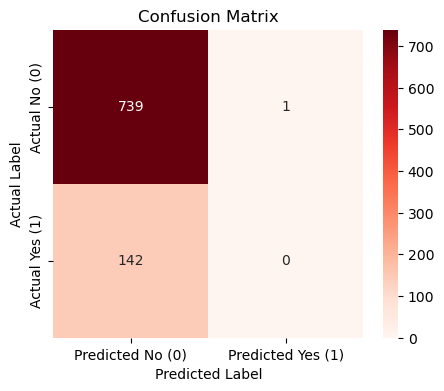

In [217]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  # Add this if missing
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted No (0)', 'Predicted Yes (1)'],yticklabels=['Actual No (0)', 'Actual Yes (1)'])

# Correct axis labels
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()



In [197]:
#Improvement Over the Previous Model#
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight='balanced', random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
cm_log = confusion_matrix(y_test, y_pred_log)
print(cm_log)

[[448 292]
 [ 49  93]]


In [199]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Train Random Forest model on balanced data
rf_model_bal = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_bal.fit(X_train_bal, y_train_bal)

# Predict again
y_pred_rf_bal = rf_model_bal.predict(X_test)

# New Confusion Matrix
cm_rf_bal = confusion_matrix(y_test, y_pred_rf_bal)
print(cm_rf_bal)

[[708  32]
 [  6 136]]


In [201]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf_bal)
precision = precision_score(y_test, y_pred_rf_bal)
recall = recall_score(y_test, y_pred_rf_bal)
f1 = f1_score(y_test, y_pred_rf_bal)
# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.96
Precision: 0.81
Recall: 0.96
F1-Score: 0.88


In [ ]:
# visualize performance, plot the confusion matrix#

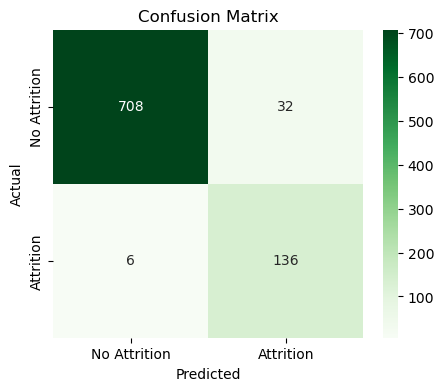

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf_bal, annot=True, fmt='d', cmap='Greens', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

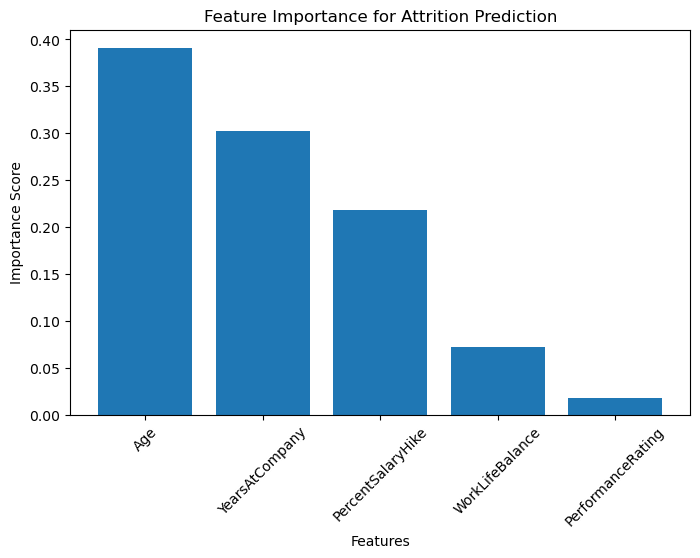

In [223]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance scores from the trained Random Forest model
importance = rf_model_bal.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(importance)[::-1]

# Plot feature importance
plt.figure(figsize=(8,5))
plt.title("Feature Importance for Attrition Prediction")
plt.bar(range(X.shape[1]), importance[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in sorted_indices], rotation=45)
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

In [213]:
merged_df2

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1,6,1,0,0,3,4,2,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6,3,5,1,4,3,2,4,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5,2,5,0,3,2,2,1,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13,5,8,7,5,4,4,3,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9,2,6,0,4,4,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10,5,3,0,2,4,1,3,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10,2,3,0,2,4,4,3,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5,4,4,1,2,1,3,3,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,10,2,9,7,8,4,1,3,2,3


In [215]:
# Count total employees
total_employees = len(merged_df2)

# Count employees who left (assuming Attrition is 'Yes' or 'No')
employees_who_left = merged_df2[merged_df2['Attrition'] == 'Yes'].shape[0]

# Calculate attrition rate
attrition_rate = (employees_who_left / total_employees) * 100

print(f"Overall Attrition Rate: {attrition_rate:.2f}%")

Overall Attrition Rate: 16.12%
